
reference 

https://www.eecis.udel.edu/~boncelet/ipython.html

University of Delaware

Professor and Associate Chair

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


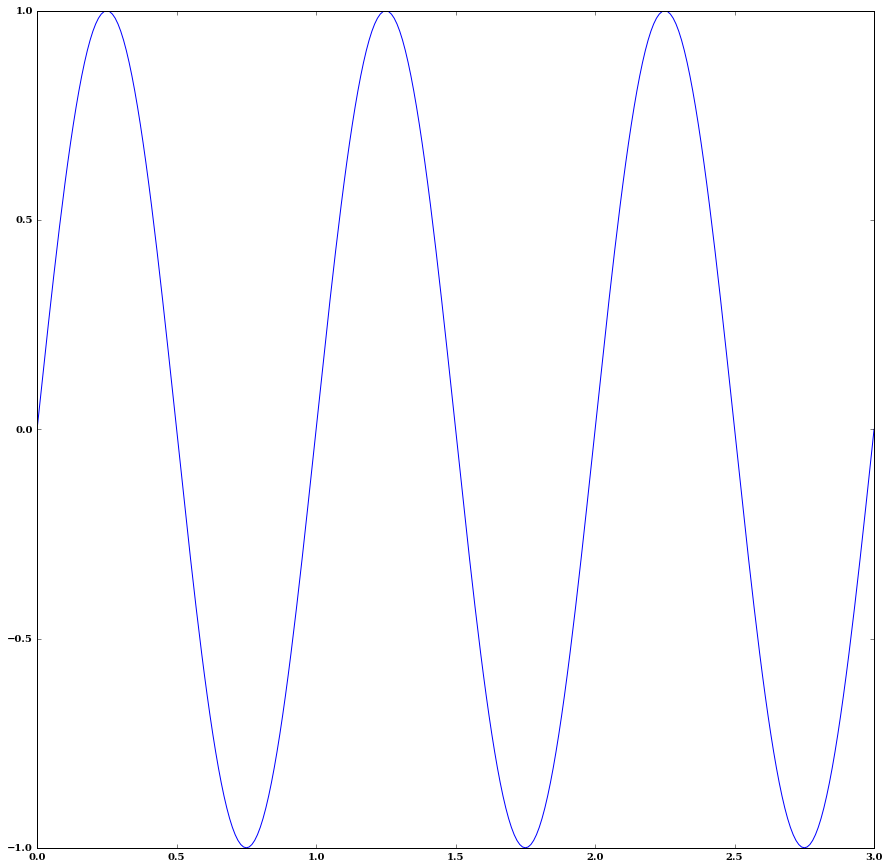

In [620]:
figure(figsize=(15, 15))
f = 1
Fs = 100 #a lot more than twice per period
t = linspace(0,3,3*Fs+1)
y = sin(2*pi*f*t)
plot(t,y)

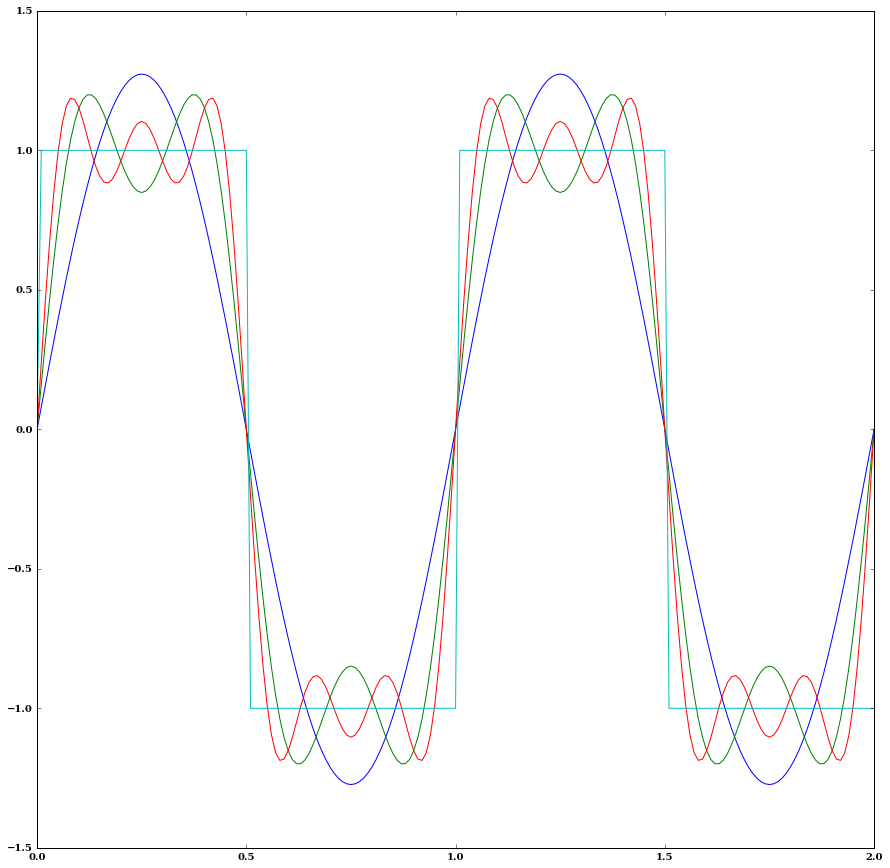

In [621]:
figure(figsize=(15, 15))
t = linspace(0,2,201) #two cycles, 100 points each
y1 = (4/pi)*sin(2*pi*f*t)
y3 = y1 + (4/(3*pi))*sin(2*pi*3*f*t)
y5 = y3 + (4/(5*pi))*sin(2*pi*5*f*t)
sqwave = sign(sin(2*pi*f*t)) #an actual square wave
plot(t,y1, t,y3, t,y5, t, sqwave)

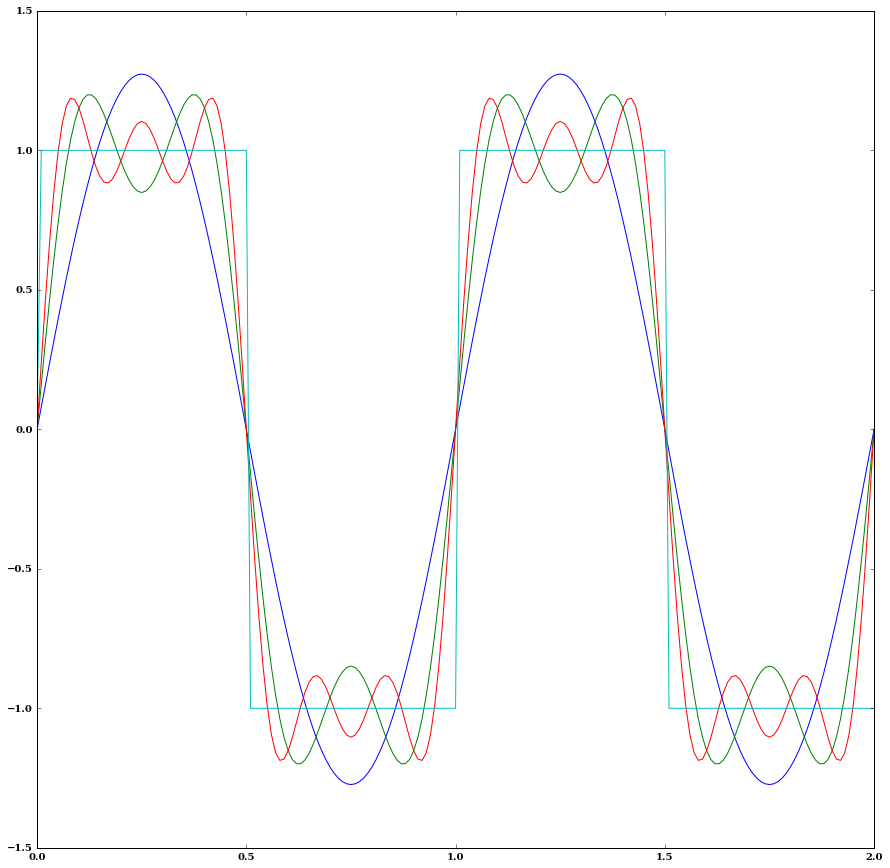

In [626]:
figure(figsize=(15, 15))

t = linspace(0,2,201) #two cycles, 100 points each
y1 = (4/pi)*sin(2*pi*f*t)
y3 = y1 + (4/(3*pi))*sin(2*pi*3*f*t)
y5 = y3 + (4/(5*pi))*sin(2*pi*5*f*t)
sqwave = sign(sin(2*pi*f*t)) #an actual square wave
plot(t,y1, t,y3, t,y5, t, sqwave)

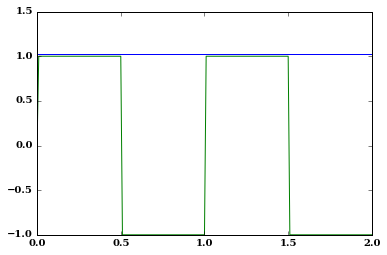

In [631]:
sq = zeros(len(t)) #preallocate the output array
for h in arange(1,25,2):
    sq += (4/(pi*h))*sin(2*pi*f*h*pi)

plot(t,sq, t,sqwave)

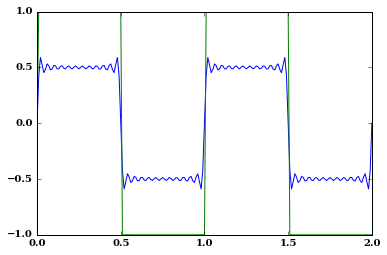

In [641]:
not_sq = zeros(len(t))
for h in arange(1,25,2):
    not_sq += (2/(pi*h))*sin(2*pi*f*h*t)

plot(t,not_sq, t,sqwave)

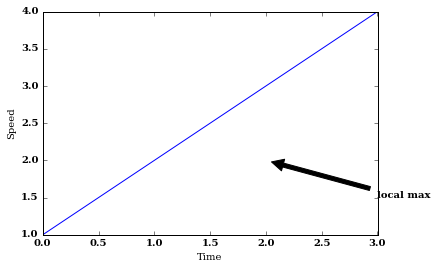

In [86]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], label='Normal')
plt.ylabel = 'some numbers'
plt.title = 'Histogram of IQ'
plt.annotate('local max', xy=(2, 2), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


pylab.xlabel("Time")
pylab.ylabel("Speed")

In [3]:
import matplotlib.pyplot as plt

In [618]:
from scipy import signal


font = {'family' : 'serif',
        'weight' : 'black',
        'size'   : 10}
matplotlib.rc('font', **font)

def minus_to_zero(l):
    return list(map(lambda elem: elem if elem == 1 else 0, l))


def pwm_generator(l, amp=1, duty=0.5):
    return (lambda duty:
                list(map(lambda elem: 0 if elem < duty else amp, l))
           )((1-duty)*amp)


def make_square_odd(freq=1, amp=1, duty=0.5):
    return (lambda square: 
                pwm_generator(square, amp, duty)
           )(amp * abs(signal.sawtooth(2 * np.pi * 1 * t)))


def set_basic_graph():
    figure(figsize=(15, 15))
    
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.ylim(-2, 2)
    plt.xlim(-1, 1)
    
    x_range = range(-1, 2)
    x_labels = [r"$-T$", 0, r"$T$"]
    plt.xticks(x_range, x_labels)
    
    return linspace(-3,3,1000) # precision : 1000 (x axis)

def set_basic_label(label=''):
    patch = mpatches.Patch(color='blue', label=label)
    plt.legend(handles=[patch])    

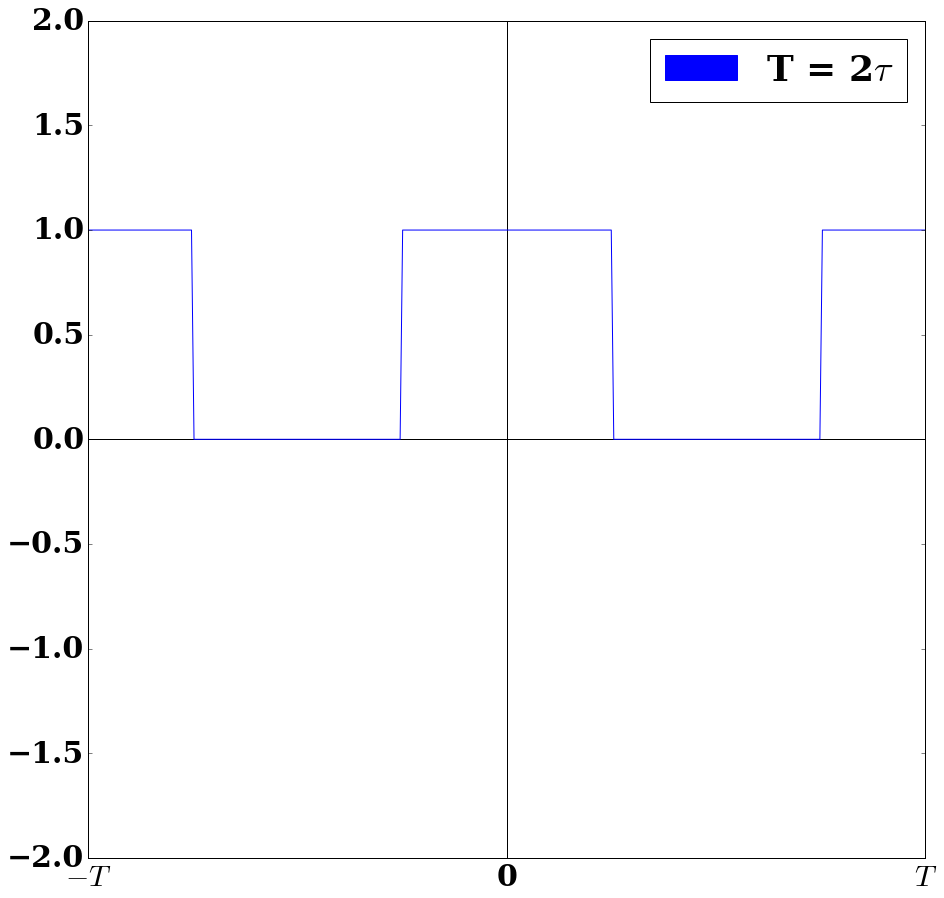

In [131]:
# make square wave using sawtooth
# indirection solution


t = set_basic_graph()
set_basic_label(r'T = 2$\tau$')
plt.plot(t, make_square_odd())

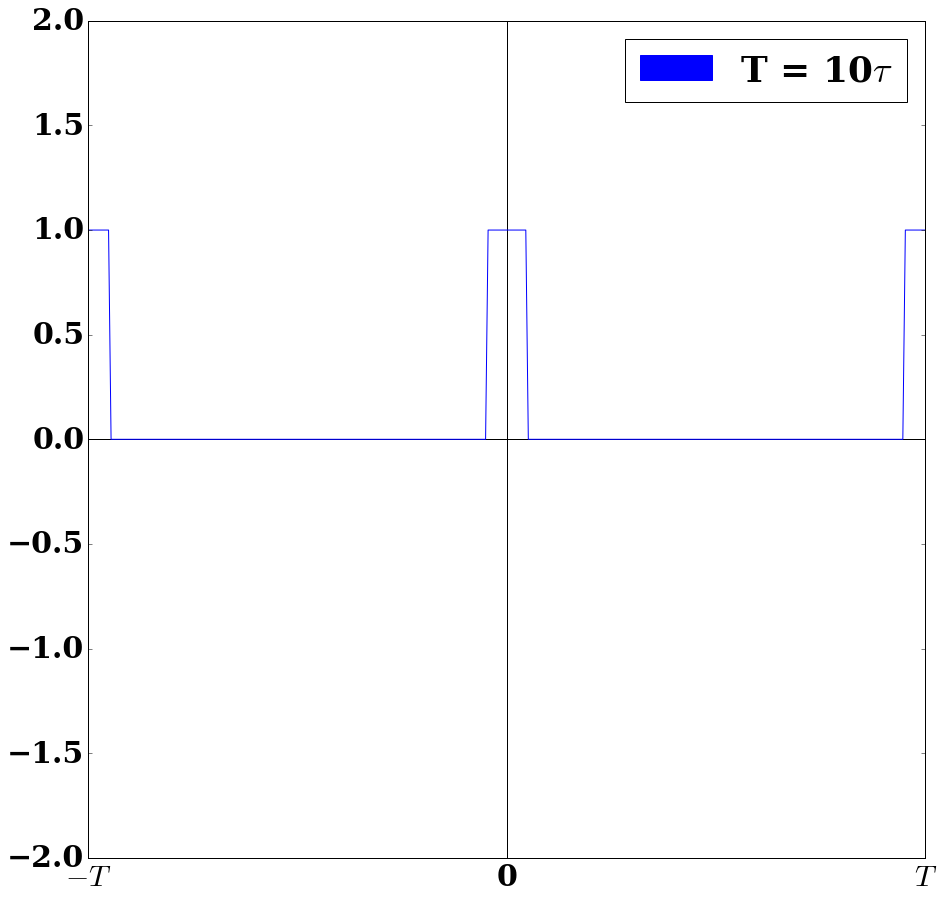

In [132]:
# make square wave using sawtooth
# indirection solution


t = set_basic_graph()
set_basic_label(r'T = 10$\tau$')
plt.plot(t, make_square_odd(duty=0.1))

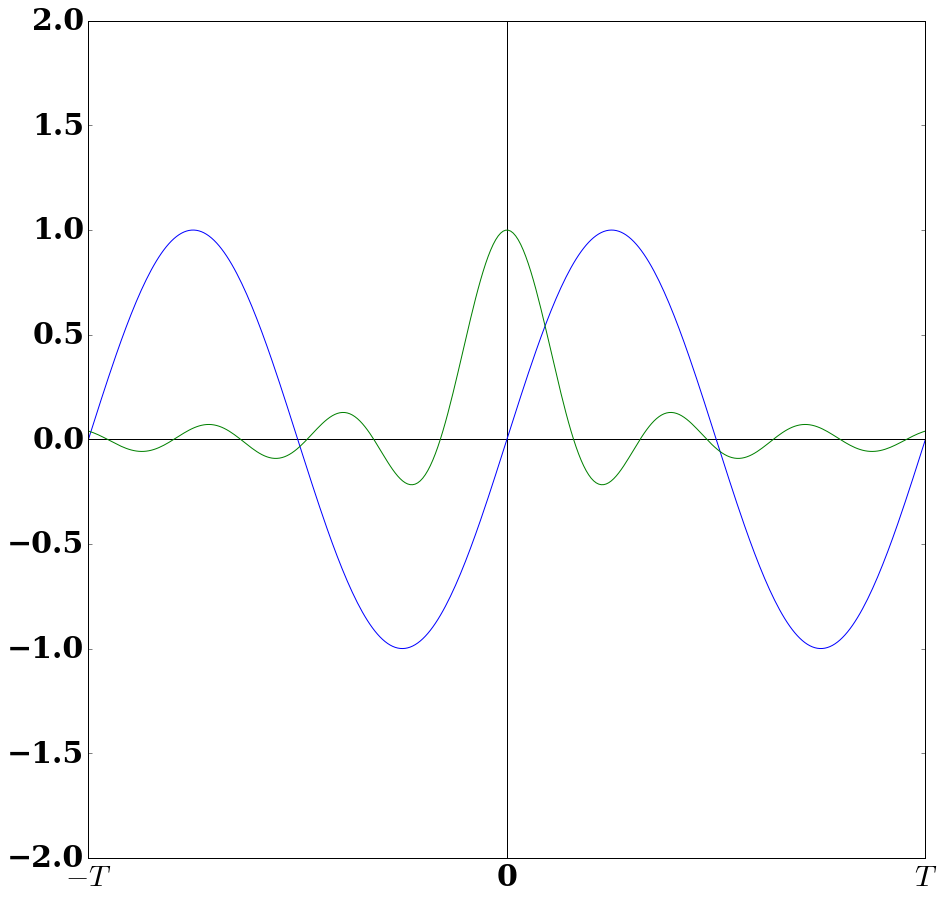

In [110]:
set_basic_graph()

plt.plot(t, sin(2 * np.pi * t))
plt.plot(t, sinc(2 * np.pi * t))
#plt.plot(t, sinc(make_square_odd()))

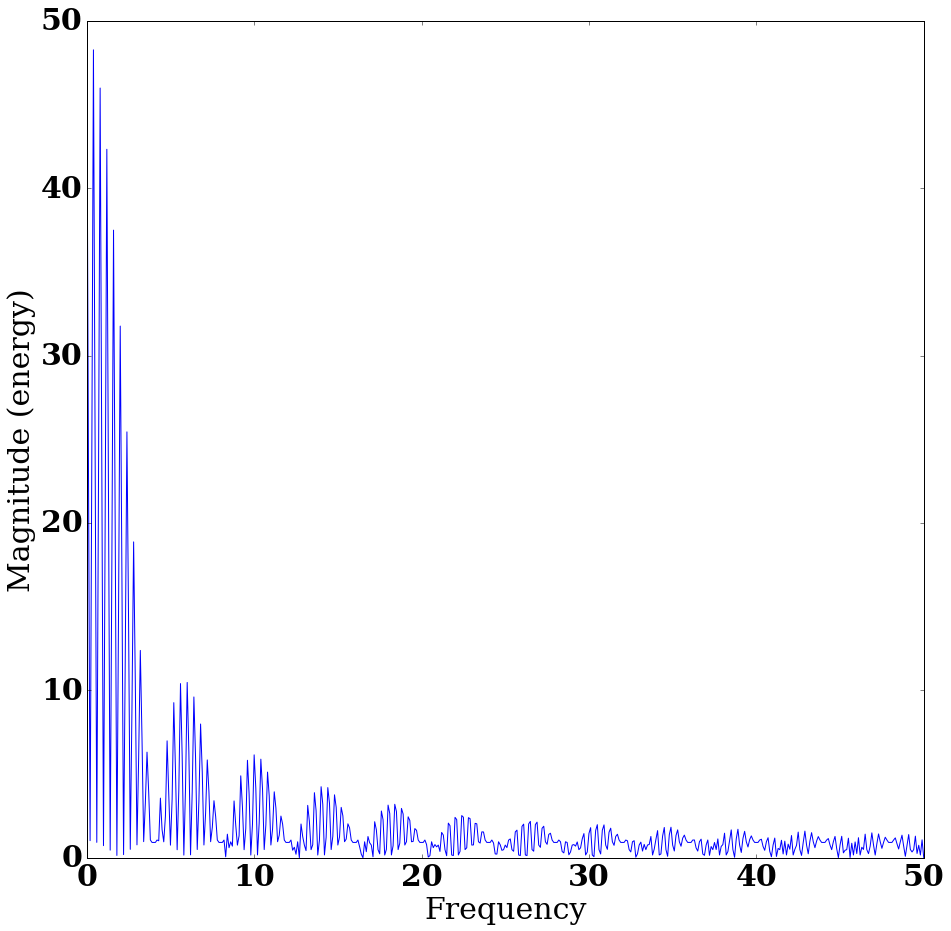

In [223]:
import matplotlib.pyplot as plt
import numpy as np


figure(figsize=(15,15))

dt = 0.01
Fs = 1/dt
plt.xlim(0, Fs/2)


plt.magnitude_spectrum(make_square_odd(duty=0.1), Fs=Fs)#plot(t,sq, t,sqwave)
plt.show()

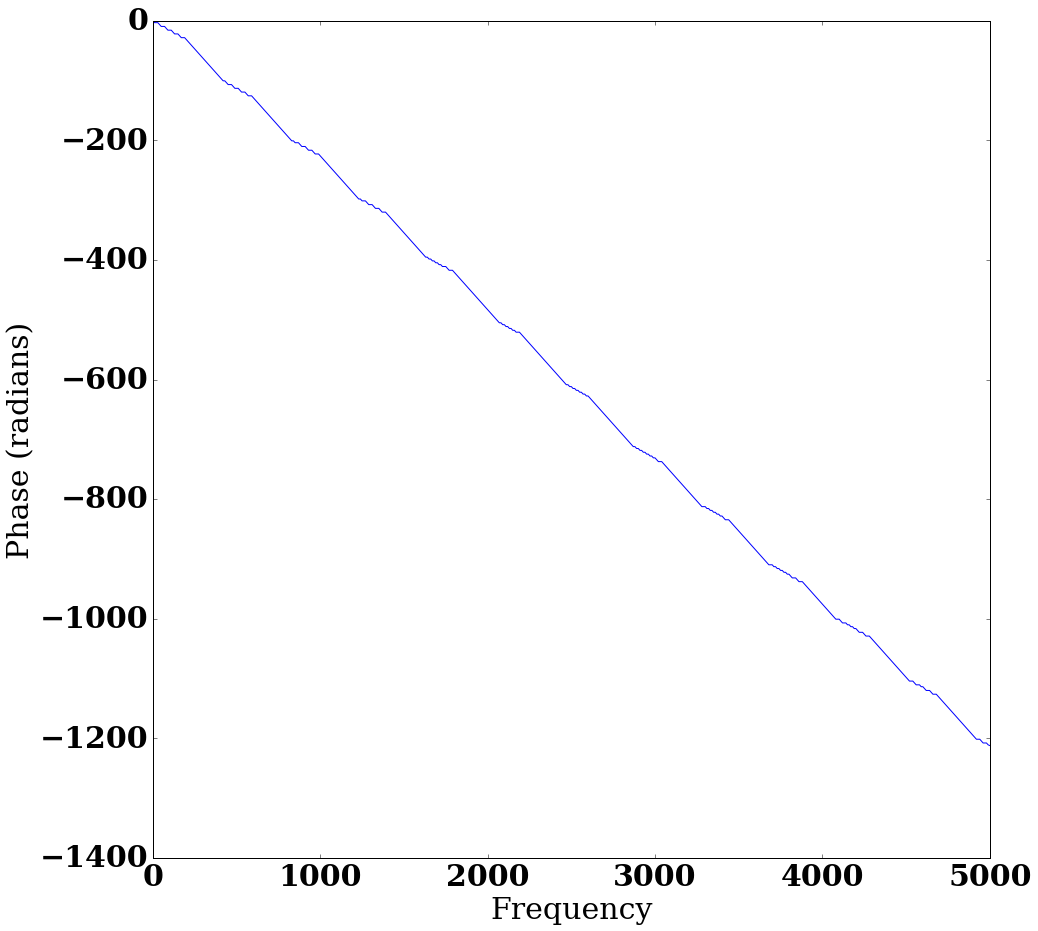

In [206]:
figure(figsize=(15,15))
plt.phase_spectrum(make_square_odd(duty=0.1), Fs=10000)#plot(t,sq, t,sqwave)
plt.show()


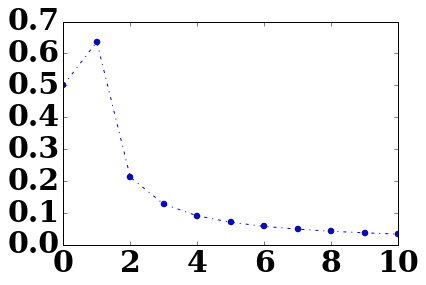

In [311]:
a_0 = 0.5
a_n = \
    list(map((lambda k:
                  (lambda n: 2/(n*np.pi)
                  )(2*k-1)),
             list(range(1, 10+1))))
f = [a_0] + a_n

tt = linspace(0,10,11) # precision : 1000 (x axis)

plt.plot(tt, f, marker='o', linestyle='-.')
plt.show()

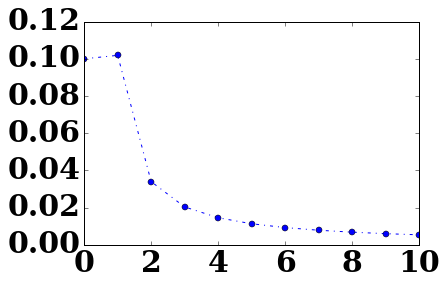

In [315]:
a_0 = 0.1
a_n = \
    list(map((lambda k:
                  (lambda n: (4/25)*(2/(n*np.pi))
                  )(2*k-1)),
             list(range(1, 10+1))))
f = [a_0] + a_n

tt = linspace(0,10,10+1) # precision : 1000 (x axis)

plt.plot(tt, f, marker='o', linestyle='-.')
plt.show()

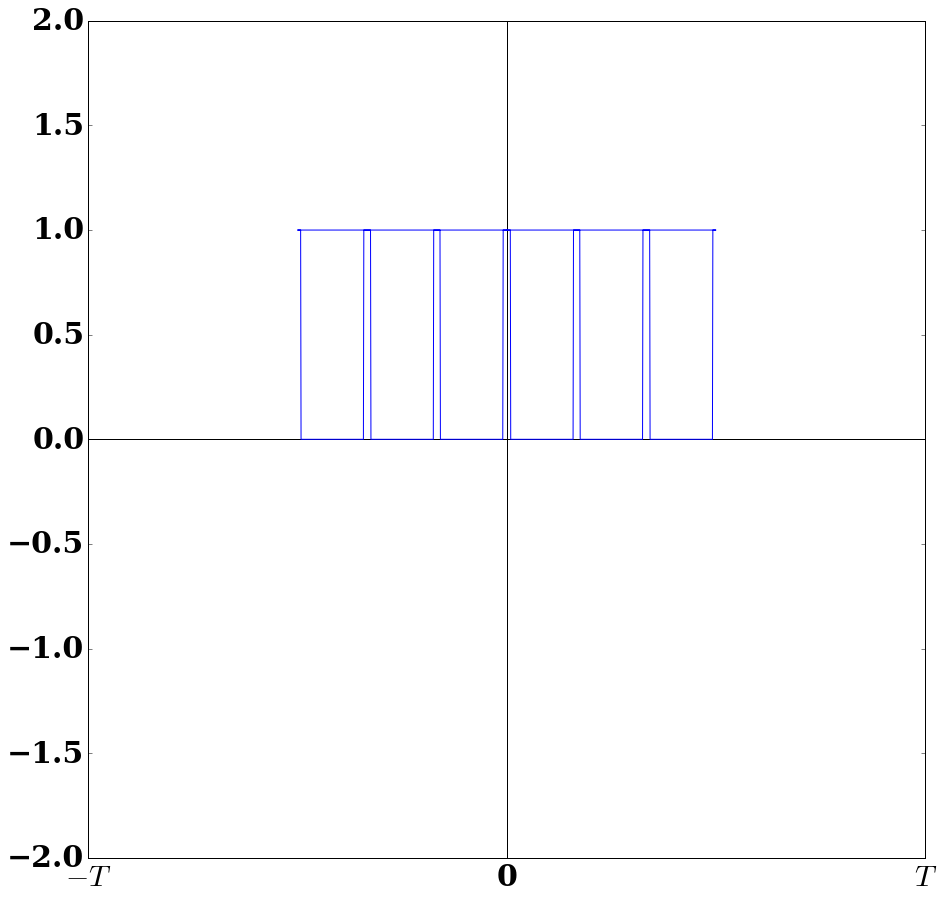

In [341]:
t = set_basic_graph()

sp = make_square_odd(duty=0.1)

#t = np.arange(256)
#sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp)
plt.show()

#plt.plot(t, qwe)

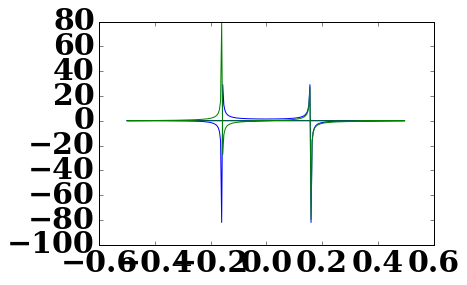

In [323]:
>>> import matplotlib.pyplot as plt
>>> t = np.arange(256)
>>> sp = np.fft.fft(np.sin(t))
>>> freq = np.fft.fftfreq(t.shape[-1])
>>> plt.plot(freq, sp.real, freq, sp.imag)
>>> plt.show()

In [509]:
from scipy import integrate

In [529]:
T=1
tau=T/2
w0 = 2 * np.pi / T

In [530]:
w0

6.283185307179586

In [573]:
def cal_bn(T=1, tau=0.5):
    return \
        list(map(
            lambda n: 
                (4/T) * integrate.quad(lambda t: sin(n*(2*np.pi/T)*t), 0, (tau/2))[0]
            ,(list(range(1, 10+1)))))
    

a_0 = 0.5
b_n = cal_bn()
b_n

[0.6366197723675813,
 0.6366197723675814,
 0.2122065907891938,
 -1.1372737176807543e-17,
 0.12732395447351622,
 0.21220659078919382,
 0.09094568176679743,
 -8.210495028911062e-17,
 0.07073553026306453,
 0.12732395447351624]

In [569]:
(4/T) * integrate.quad(lambda t: sin(2*w0*t), 0, (tau/2))[0]

0.6366197723675814

In [574]:
(4/T) * integrate.quad(lambda t: sin(np.pi*), 0, (tau/2))[0]

1.2246467991473532e-16

In [605]:
4/T * integrate.quad(lambda t: sin(2*w0*t), 0, tau/2)[0]

0.6366197723675814

In [593]:
w0

6.283185307179586